In [418]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,roc_curve, auc
from scipy.stats import uniform
%matplotlib inline

In [419]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [420]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [421]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [422]:
titanic_df.shape

(891, 15)

In [423]:
titanic_df.drop('deck', axis=1, inplace=True)


In [424]:
titanic_df = titanic_df.dropna()

In [425]:
titanic_df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [426]:
titanic_df.drop(['fare', 'embarked', 'who', 'adult_male', 'alive', 'sibsp', 'parch', 'class'], axis=1, inplace=True)

In [427]:
titanic_df.head()

,survived,pclass,sex,age,embark_town,alone
0,0,3,male,22.0,Southampton,False
1,1,1,female,38.0,Cherbourg,False
2,1,3,female,26.0,Southampton,True
3,1,1,female,35.0,Southampton,False
4,0,3,male,35.0,Southampton,True


c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


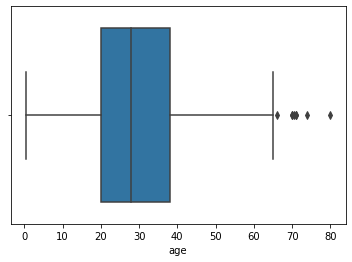

In [428]:
sns.boxplot(titanic_df['age'])
plt.show()

In [429]:
titanic_df.duplicated().sum()

215

## Modelling

In [430]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
ohe = OneHotEncoder(drop="first", sparse=False)

# Fit and transform the categorical columns
encoded = ohe.fit_transform(titanic_df[['sex', 'embark_town', 'alone']])

# Convert back to DataFrame with correct column names
Encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names(['sex', 'embark_town', 'alone']))

# Drop original columns & add encoded columns
titanic_df = titanic_df.drop(columns=['sex', 'embark_town', 'alone']).join(Encoded_df)


In [431]:
titanic_df.isna().sum()

survived                     0
pclass                       0
age                          0
sex_male                   148
embark_town_Queenstown     148
embark_town_Southampton    148
alone_True                 148
dtype: int64

In [432]:
titanic_df.dropna(inplace=True)

In [433]:
titanic_df.head()

,survived,pclass,age,sex_male,embark_town_Queenstown,embark_town_Southampton,alone_True
0,0,3,22.0,1.0,0.0,1.0,0.0
1,1,1,38.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0.0,0.0,1.0,1.0
3,1,1,35.0,0.0,0.0,1.0,0.0
4,0,3,35.0,1.0,0.0,1.0,1.0


In [434]:
#spliting the data
x = titanic_df.drop("survived", axis=1)
y = titanic_df["survived"]

In [435]:
#split data into train and test
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=42, stratify=y)

In [436]:
#scaling
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [437]:
x_train_sc = pd.DataFrame(x_train_sc)
x_test_sc = pd.DataFrame(x_test_sc)


In [438]:
#Build the model
base_model = LogisticRegression(random_state=42)
base_model.fit(x_train_sc, y_train)

LogisticRegression(random_state=42)

In [439]:
# Evaluate base model
y_pred = base_model.predict(x_test_sc)
y_pred_proba = base_model.predict_proba(x_test_sc)[:, 1]

In [440]:
print(y[1])
print(y_pred[1])


1
0


### **Why Use y_pred_proba?**
1. It’s useful for ROC-AUC calculation, as ROC curves work with probability scores rather than hard classifications.
2. It allows threshold tuning—you can adjust the probability threshold for deciding survival (e.g., predicting survival if p > 0.6 instead of 0.5).

## Metrics

In [441]:
base_metrics = {
    'Accuracy': round(accuracy_score(y_test, y_pred),2),
    'Precision': round(precision_score(y_test, y_pred,2)),
    'Recall': round(recall_score(y_test, y_pred),2),
    'F1 Score': round(f1_score(y_test, y_pred),2),
    'ROC AUC': round(roc_auc_score(y_test, y_pred_proba),2 )
}
print("Base Model Metrics:\n", base_metrics)

print(classification_report(y_test, y_pred))

Base Model Metrics:
 {'Accuracy': 0.69, 'Precision': 1, 'Recall': 0.59, 'F1 Score': 0.61, 'ROC AUC': 0.74}
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        67
           1       0.63      0.59      0.61        46

    accuracy                           0.69       113
   macro avg       0.68      0.67      0.68       113
weighted avg       0.69      0.69      0.69       113



c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


#### **Accuracy** (0.6903 or ~69%)
This means the model correctly predicts survival for about 69% of passengers in the test set.
While accuracy is a good baseline metric, it may be misleading if the dataset is imbalanced.
Precision (0.6279 or ~63%)

#### **Precision**
A precision of ~63% means that when the model predicts survival, it's correct about 63% of the time.
Higher precision is desirable when false positives (predicting survival when the person actually didn’t survive) are costly.
Recall (0.5869 or ~59%)

#### **Recall**
At ~59%, this means the model captures about 59% of all actual survivors.
If recall is low, it means the model is missing many actual survivors (false negatives).
F1 Score (0.6067 or ~61%)

#### **The F1 Score.**
A score of ~61% suggests a moderate balance but room for improvement.
If survival prediction is critical, you might want to optimize for F1 score instead of just accuracy.

#### **ROC AUC Score (0.7443 or ~74%)**

Measures the model’s ability to distinguish between survivors and non-survivors.
A 74% score is decent but suggests the model is not highly confident in its classifications.
Closer to 1.0 is better, while 0.5 would mean the model is performing no better than random guessing.

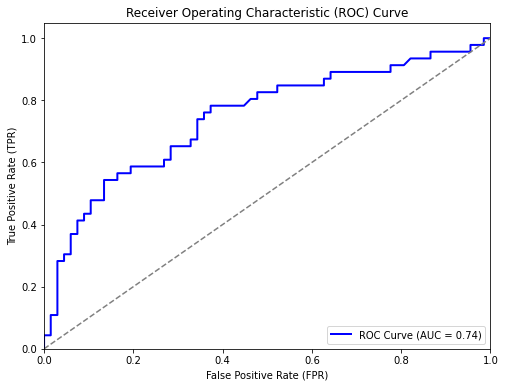

In [442]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # Use probability predictions from the best model
roc_auc = auc(fpr, tpr)  # Compute AUC score

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [443]:
# Compute confusion matrix
confm=confusion_matrix(y_test, y_pred)

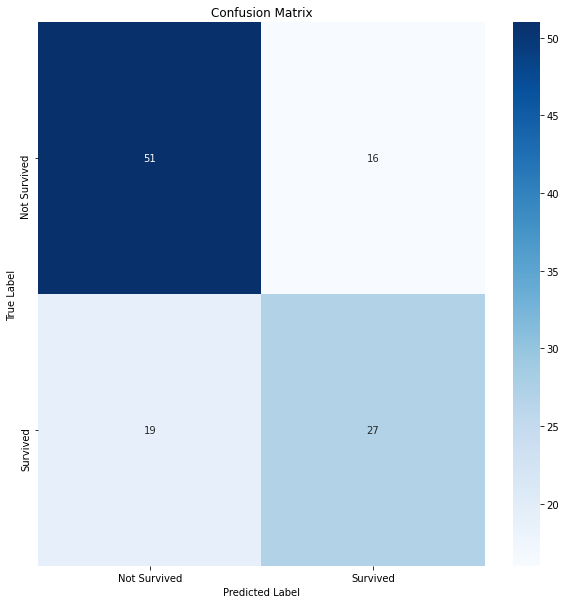

In [444]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(confm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Hyperparameter Tuning

## GridsearchCV

In [445]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

In [446]:
# Grid Search CV
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_sc, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [447]:
# Best model after tuning
grid_best_model = grid_search.best_estimator_
y_pred_tuned = grid_best_model.predict(x_test_sc)
y_pred_proba_tuned = grid_best_model.predict_proba(x_test_sc)[:, 1]

In [448]:
print(y[1])
print(y_pred[1])


1
0


In [449]:
# Evaluate GridSearchCV tuned model 
tuned_metrics = {
     'Accuracy': round(accuracy_score(y_test, y_pred_tuned),2),
    'Precision': round(precision_score(y_test, y_pred_tuned,2)),
    'Recall': round(recall_score(y_test, y_pred_tuned),2),
    'F1 Score': round(f1_score(y_test, y_pred_tuned),2),
    'ROC AUC': round(roc_auc_score(y_test, y_pred_proba_tuned),2 )
    
}

print("\nGridSearchCV Tuned Model Metrics:\n", tuned_metrics)
print(classification_report(y_test, y_pred_tuned))


GridSearchCV Tuned Model Metrics:
 {'Accuracy': 0.69, 'Precision': 1, 'Recall': 0.59, 'F1 Score': 0.61, 'ROC AUC': 0.74}
              precision    recall  f1-score   support

           0       0.73      0.76      0.74        67
           1       0.63      0.59      0.61        46

    accuracy                           0.69       113
   macro avg       0.68      0.67      0.68       113
weighted avg       0.69      0.69      0.69       113



c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


#### **Accuracy** (0.6903 or ~69%)
This means the model correctly predicts survival for about 69% of passengers in the test set.
While accuracy is a good baseline metric, it may be misleading if the dataset is imbalanced.
Precision (0.6279 or ~63%)

#### **Precision**
A precision of ~63% means that when the model predicts survival, it's correct about 63% of the time.
Higher precision is desirable when false positives (predicting survival when the person actually didn’t survive) are costly.
Recall (0.5869 or ~59%)

#### **Recall**
At ~59%, this means the model captures about 59% of all actual survivors.
If recall is low, it means the model is missing many actual survivors (false negatives).
F1 Score (0.6067 or ~61%)

#### **The F1 Score.**
A score of ~61% suggests a moderate balance but room for improvement.
If survival prediction is critical, you might want to optimize for F1 score instead of just accuracy.

#### **ROC AUC Score (0.7443 or ~74%)**

Measures the model’s ability to distinguish between survivors and non-survivors.
A 74% score is decent but suggests the model is not highly confident in its classifications.
Closer to 1.0 is better, while 0.5 would mean the model is performing no better than random guessing.

In [450]:
# Print best parameters
print("\nBest Hyperparameters from GridSearchCV:", grid_search.best_params_)


Best Hyperparameters from GridSearchCV: {'C': 0.1, 'solver': 'liblinear'}


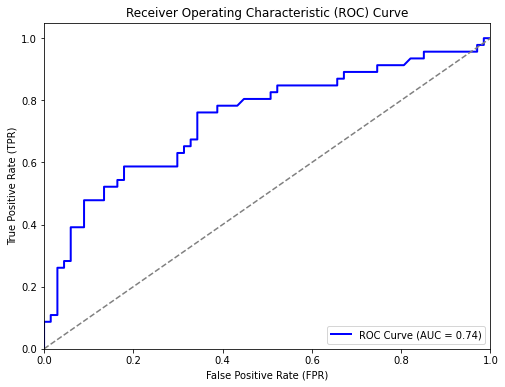

In [451]:
# Compute ROC curve
fpr_tuned, tpr_tuned, thresholds = roc_curve(y_test, y_pred_proba_tuned)  # Use probability predictions from the best model
roc_auc_tuned = auc(fpr, tpr)  # Compute AUC score

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

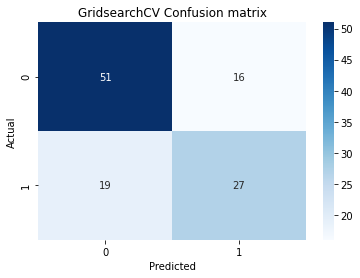

In [452]:
# Plot confusion matrix as a heatmap
confm_tuned= confusion_matrix(y_test, grid_best_model.predict(x_test_sc))
sns.heatmap(confm_tuned, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GridsearchCV Confusion matrix')
plt.show()

## RandomizedSearchCV

In [453]:
# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy', n_iter=10, n_jobs=-1, random_state=42)
random_search.fit(x_train_sc, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [454]:
# Best model after RandomizedSearchCV tuning
random_best_model = random_search.best_estimator_
y_pred_random = random_best_model.predict(x_test_sc)
y_pred_proba_random = random_best_model.predict_proba(x_test_sc)[:, 1]


In [455]:
print(y[1])
print(y_pred[1])


1
0


In [456]:
# Evaluate RandomizedSearchCV tuned model
random_metrics = {
   'Accuracy': round(accuracy_score(y_test, y_pred_random),2),
    'Precision': round(precision_score(y_test, y_pred_random,3)),
    'Recall': round(recall_score(y_test, y_pred_random),2),
    'F1 Score': round(f1_score(y_test, y_pred_random),2),
    'ROC AUC': round(roc_auc_score(y_test, y_pred_proba_random),2 )
}

print("\nRandomizedSearchCV Tuned Model Metrics:\n", random_metrics)
print(classification_report(y_test,y_pred_random))


RandomizedSearchCV Tuned Model Metrics:
 {'Accuracy': 0.71, 'Precision': 1, 'Recall': 0.59, 'F1 Score': 0.62, 'ROC AUC': 0.74}
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        67
           1       0.66      0.59      0.62        46

    accuracy                           0.71       113
   macro avg       0.70      0.69      0.69       113
weighted avg       0.70      0.71      0.70       113



c:\Users\Administrator\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


#### **Accuracy (0.7079 or ~71%)**

The model correctly classifies 71% of passengers as survivors or non-survivors.
This is an improvement from the previous ~69%, showing a positive impact of hyperparameter tuning.

#### **Precision (0.6585 or ~66%)**

Precision has increased slightly (~66% vs. ~63% before), meaning fewer false positives.
The model is better at predicting actual survivors when it says someone survived.

#### **Recall (0.5869 or ~59%)**

The recall remains the same (~59%), meaning the model is still missing some actual survivors.
If the goal is to capture more survivors, recall should be improved.

#### **F1 Score (0.6207 or ~62%)**

A moderate improvement (~62% vs. ~61%), indicating better balance between precision and recall.

#### **ROC AUC (0.7417 or ~74%)**

A very slight decrease compared to before (0.7443), but still a decent measure of how well the model distinguishes between survivors and non-survivors.
The change is minimal and within expected variations.

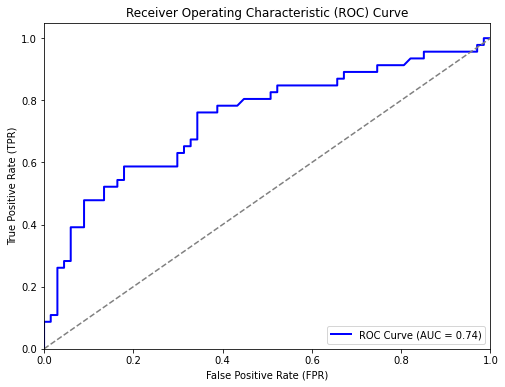

In [457]:
# Compute ROC curve
fpr_random, tpr_random, thresholds = roc_curve(y_test, y_pred_proba_random)  # Use probability predictions from the best model
roc_auc_random = auc(fpr_random, tpr_random)  # Compute AUC score

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_random, tpr_random, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

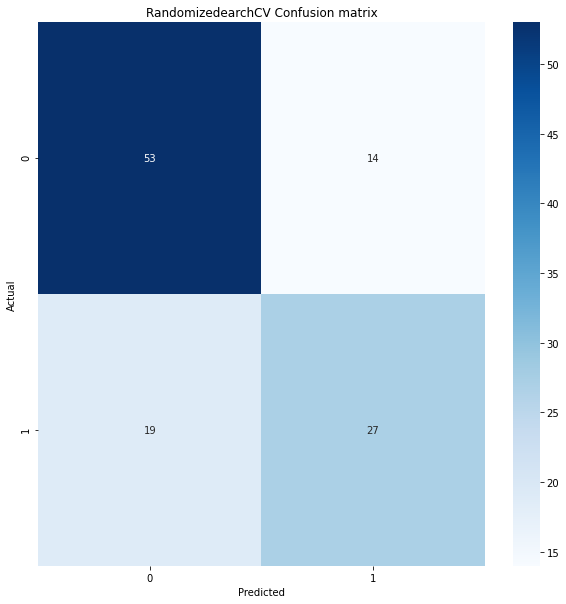

In [458]:
# Plot confusion matrix as a heatmap

confm_random= confusion_matrix(y_test, random_best_model.predict(x_test_sc))
plt.figure(figsize=(10,10))
sns.heatmap(confm_random, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomizedearchCV Confusion matrix')
plt.show()

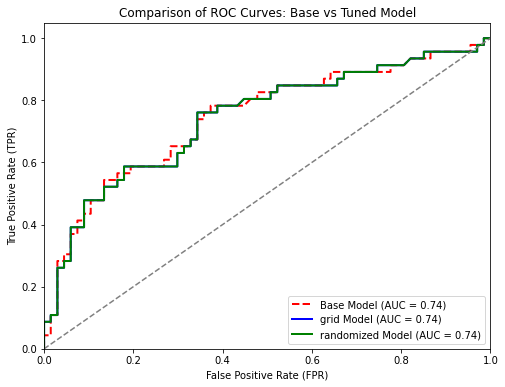

In [459]:


# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, linestyle='--', label=f'Base Model (AUC = {roc_auc:.2f})')
plt.plot(fpr_tuned, tpr_tuned, color='blue', lw=2, label=f'grid Model (AUC = {roc_auc_tuned:.2f})')
plt.plot(fpr_random, tpr_random, color='green', lw=2, label=f'randomized Model (AUC = {roc_auc_random:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Comparison of ROC Curves: Base vs Tuned Model')
plt.legend(loc="lower right")
plt.show()


In [460]:
# Print best parameters
print("\nBest Hyperparameters from RandomizedSearchCV:", random_search.best_params_)



Best Hyperparameters from RandomizedSearchCV: {'solver': 'newton-cg', 'C': 0.1}


In [461]:
# Ensure encoder is fitted
ohe.fit(x_train[categorical_features])  

# Get feature names based on sklearn version
try:
    cat_feature_names = ohe.get_feature_names()
except AttributeError:
    cat_feature_names = ohe.get_feature_names(categorical_features)  # Use older method

# Combine numerical and categorical feature names
all_feature_names = np.concatenate((numerical_features, cat_feature_names))

# Extract coefficients from the best logistic regression model
best_model = grid_best_model  # Use GridSearchCV best model (or random_best_model)
coefficients = best_model.coef_.flatten()

# Create a DataFrame to display feature importance
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)  # Sort by impact

# Display the feature importance
print("\nFeature Importance (Logistic Regression Coefficients):\n")
print(coef_df)



Feature Importance (Logistic Regression Coefficients):

                   Feature  Coefficient
4  embark_town_Southampton     0.085766
5               alone_True    -0.021279
3   embark_town_Queenstown    -0.056279
2                 sex_male    -0.185748
1                      age    -0.446349
0                   pclass    -0.864588


#### **Feature-by-Feature Analysis**

##### pclass (-0.864588)

Strong negative impact on survival → Higher class (1st class) passengers had better survival rates, while lower-class passengers (3rd class) were at much higher risk.
Since it is negative, passengers in higher-numbered classes (2nd and 3rd) had lower chances of survival.

##### age (-0.446349)

Negative coefficient → Older passengers were less likely to survive.
This aligns with historical data, where younger individuals (especially children) were prioritized for rescue.

##### sex_male (-0.185748)

Negative coefficient → Being male decreases the probability of survival.
This is expected, as the Titanic followed a "women and children first" policy during evacuation.
Female passengers had a significantly higher survival rate.

##### embark_town_Queenstown (-0.056279)

Slight negative effect → Passengers who embarked from Queenstown had a lower survival rate than those from other towns.

##### alone_True (-0.021279)

Negative but small impact → Traveling alone slightly decreased survival chances.
People traveling with family may have had better support or prioritized spots in lifeboats.

##### embark_town_Southampton (+0.085766)

Positive coefficient → Slightly increases survival probability.
This could suggest that passengers from Southampton had slightly better accommodations or travel conditions.

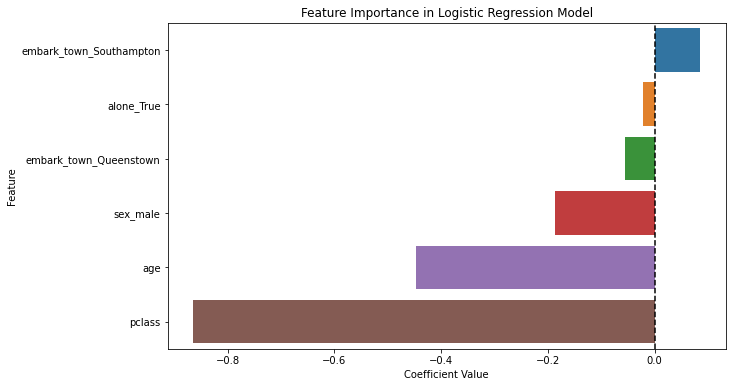

In [462]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df['Coefficient'], y=coef_df['Feature'])
plt.axvline(x=0, color='black', linestyle='--')  # Reference line at 0
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression Model")
plt.show()